In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")

https://natural-resources.canada.ca/sites/nrcan/files/oee/pdf/transportation/fuel-efficient-technologies/2022%20Fuel%20Consumption%20Guide.pdf

**Model**
4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase
	
**Transmission**	
A = automatic
AM = automated manual
AS = automatic with select shift
AV = continuously variable
M = manual
3 - 10 = Number of gears

**Fuel type**	
X = regular gasoline
Z = premium gasoline
D = diesel
E = ethanol (E85)
N = natural gas

In [34]:
df = pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [35]:
df.shape

(7385, 12)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [37]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [61]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [105]:
new_columns = {
    'make': 'Make',
    'model': 'Model',
    'vehicle_class': 'Class',
    'engine_size(l)': 'Engine_Size',
    'cylinders': 'Cylinders',
    'transmission': 'Transmission',
    'fuel_type': 'Fuel_Type',
    'fuel_consumption_city_(l/100_km)': 'City_Consumption',
    'fuel_consumption_hwy_(l/100_km)': 'Highway_Consumption',
    'fuel_consumption_comb_(l/100_km)': 'Combined_Consumption',
    'fuel_consumption_comb_(mpg)': 'Combined_MPG',
    'co2_emissions(g/km)': 'CO2_Emissions'
}


df.rename(columns=new_columns, inplace=True)
df.head()

,Make,Model,Class,Engine_Size,Cylinders,Transmission,Fuel_Type,City_Consumption,Highway_Consumption,Combined_Consumption,Combined_MPG,CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [106]:
# Duplicate Check
# Bu kısımlar duplicate mi? 

df[df.duplicated()==True]

,Make,Model,Class,Engine_Size,Cylinders,Transmission,Fuel_Type,City_Consumption,Highway_Consumption,Combined_Consumption,Combined_MPG,CO2_Emissions


In [107]:
df.drop_duplicates(keep='first',inplace=True)
df

,Make,Model,Class,Engine_Size,Cylinders,Transmission,Fuel_Type,City_Consumption,Highway_Consumption,Combined_Consumption,Combined_MPG,CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [108]:
for i in df.columns:
    print(i,': ',df[i].nunique())
    print("\n")

Make :  42


Model :  2053


Class :  16


Engine_Size :  51


Cylinders :  8


Transmission :  27


Fuel_Type :  5


City_Consumption :  211


Highway_Consumption :  143


Combined_Consumption :  181


Combined_MPG :  54


CO2_Emissions :  331




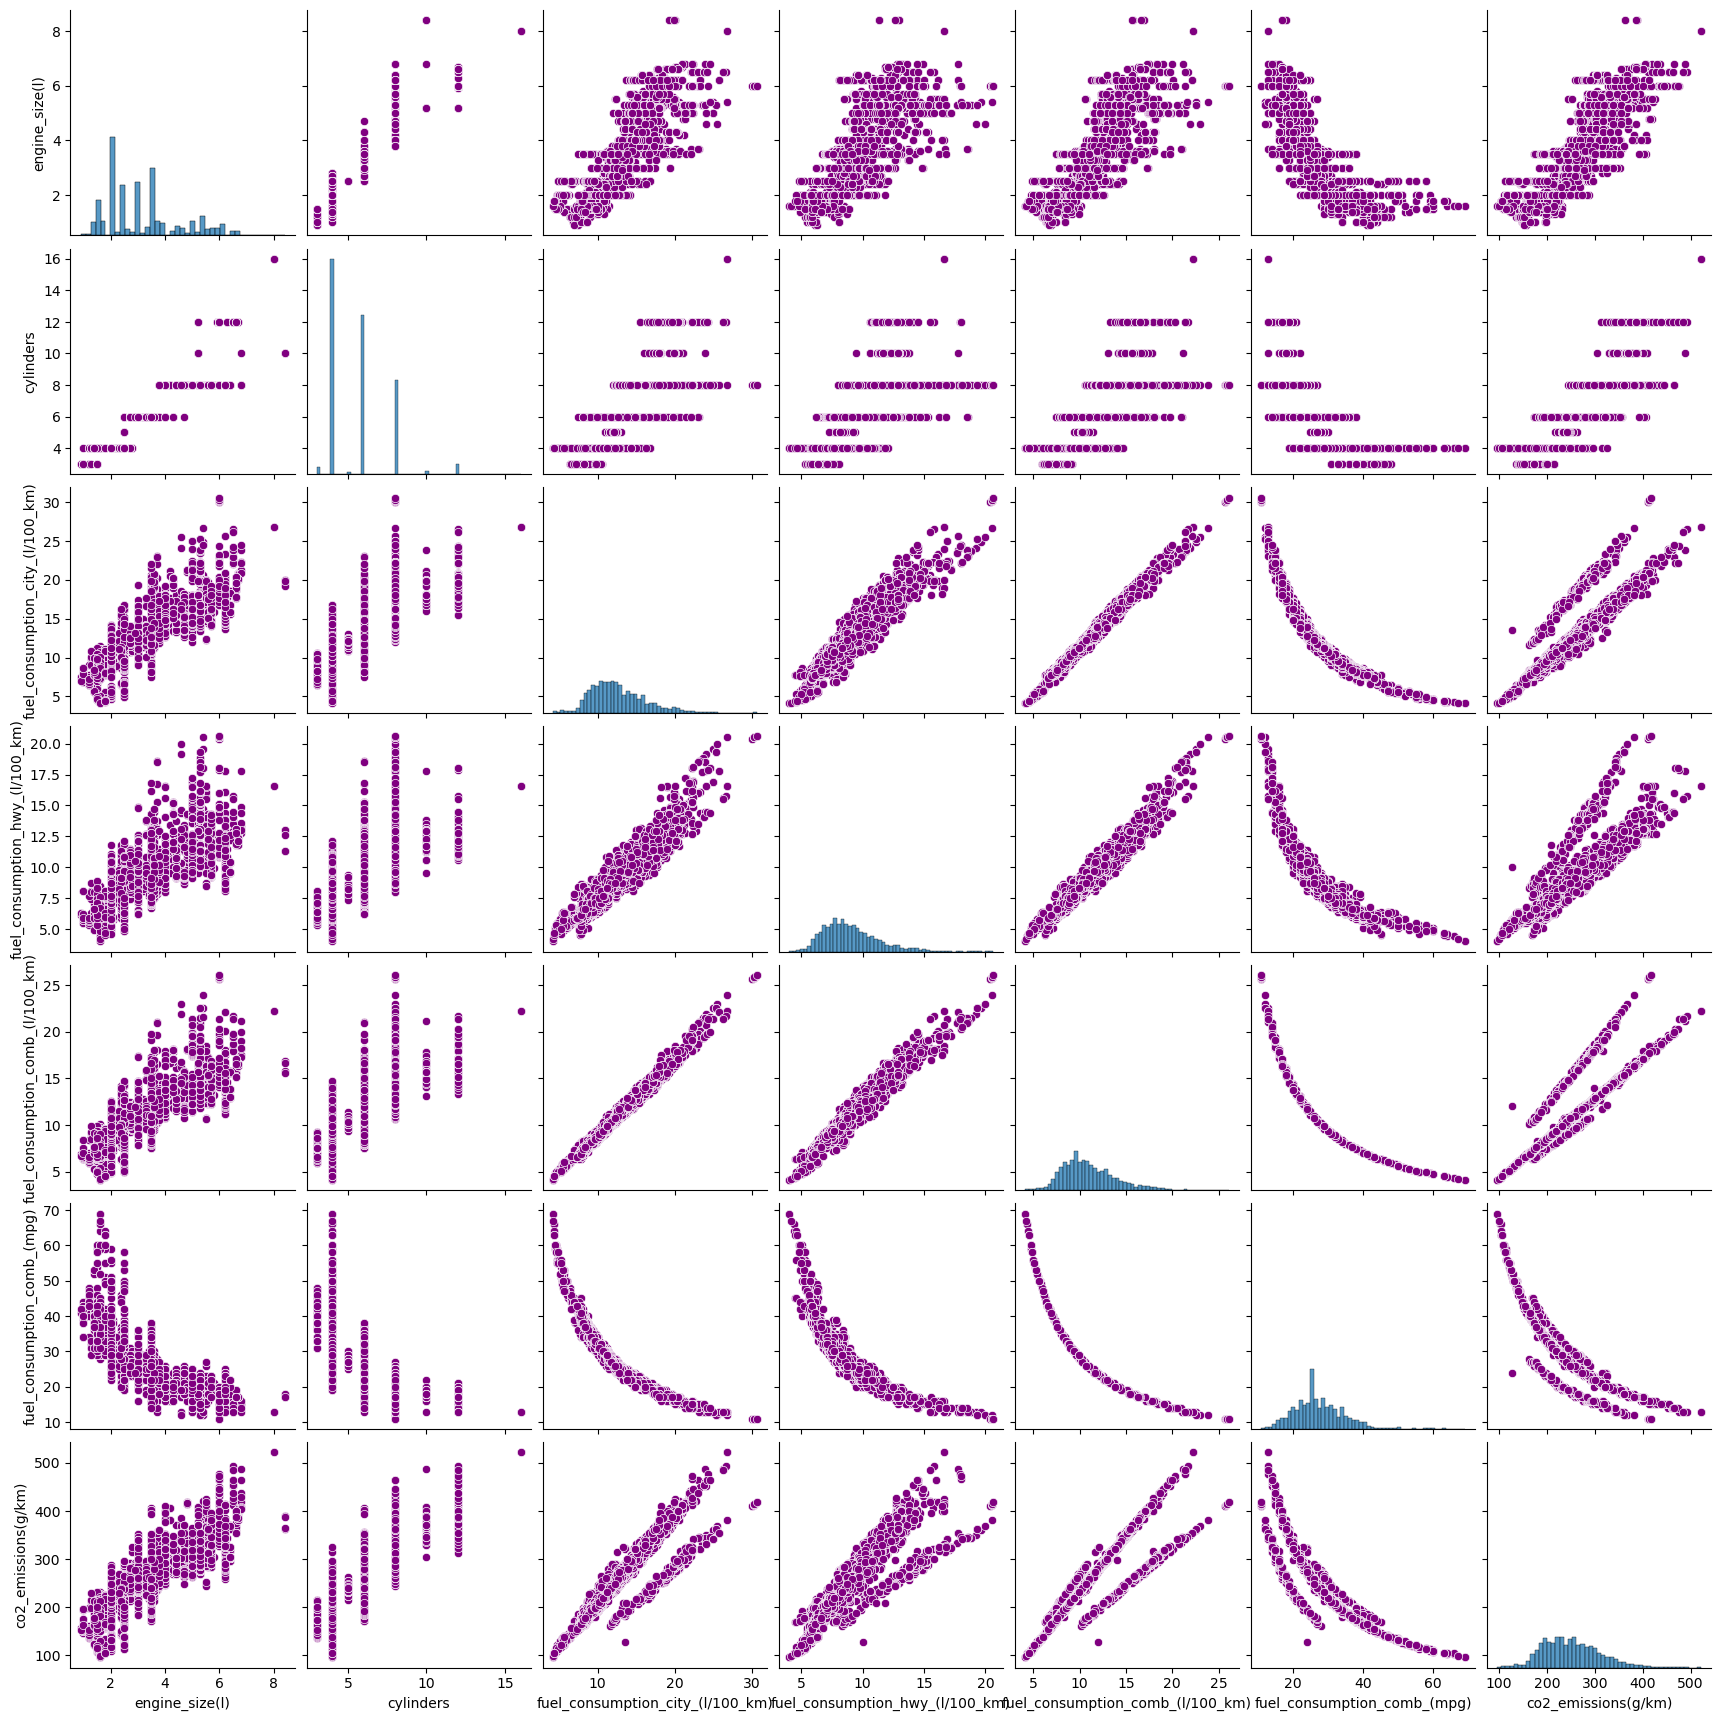

In [65]:
sns.pairplot(df, plot_kws = {'color': 'purple'});

In [109]:
# Numerik sütunları seçelim

df_numeric = df.select_dtypes(include=np.number)
df_numeric

,Engine_Size,Cylinders,City_Consumption,Highway_Consumption,Combined_Consumption,Combined_MPG,CO2_Emissions
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


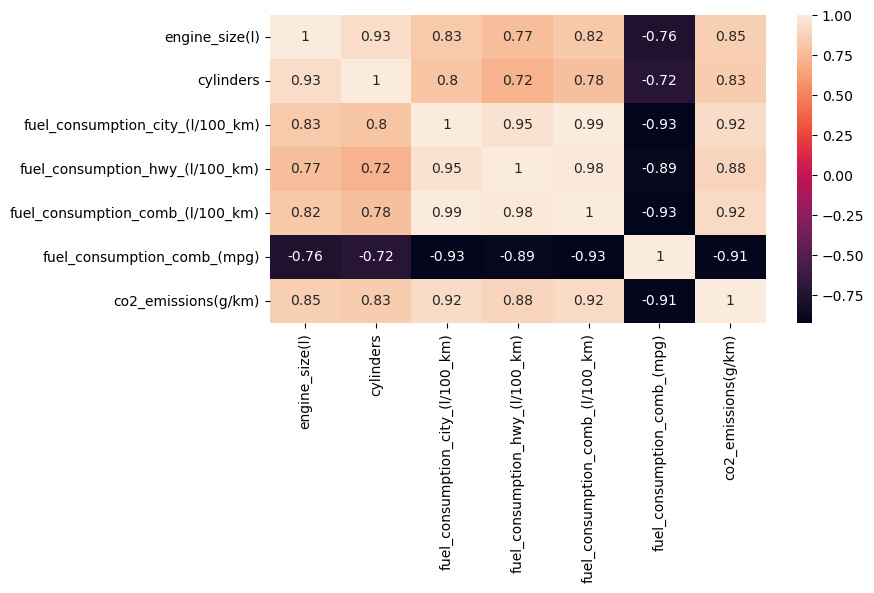

In [67]:
sns.heatmap(df_numeric.corr(), annot=True);

**data vis eksik!!**

# Linear Regression

In [69]:
df_2 = df[["Engine_Size","CO2_Emissions"]]
df_2

,Engine_Size,CO2_Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


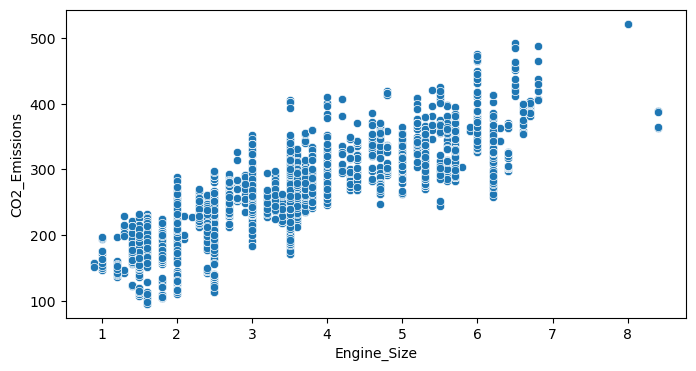

In [70]:
sns.scatterplot(x = "Engine_Size", y = "CO2_Emissions", data = df_2);

In [71]:
corr = df.CO2_Emissions.corr(df.Engine_Size)
corr

0.8548015655053498

In [72]:
R2_score = corr**2
R2_score

0.7306857163903968

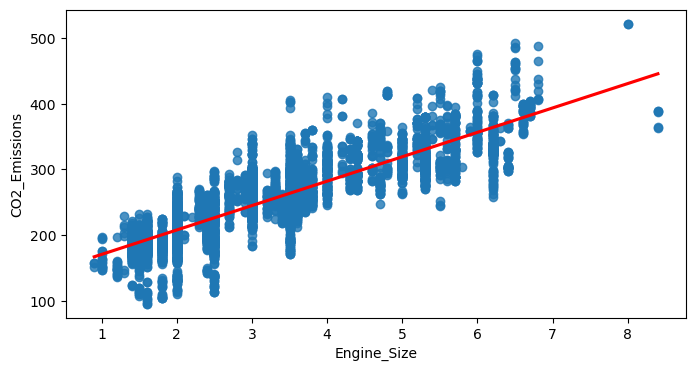

In [73]:
sns.regplot(x = "Engine_Size", y ="CO2_Emissions", data=df_2, ci=None, line_kws={"color": "red"});


In [74]:
X = df["Engine_Size"]
y = df["CO2_Emissions"]

In [75]:
b1, b0 = np.polyfit(X, y, deg = 1)
print("b1 :", b1)
print("b0 :", b0)

b1 : 37.12386481161426
b0 : 133.7790886945734


In [76]:
y_pred = b1*X + b0
y_pred

0       208.026818
1       222.876364
2       189.464886
3       263.712616
4       263.712616
           ...    
7380    208.026818
7381    208.026818
7382    208.026818
7383    208.026818
7384    208.026818
Name: Engine_Size, Length: 6282, dtype: float64

In [90]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_pf_d1 = pd.DataFrame(values)
df_pf_d1

,actual,predicted,residual,LSE
0,196,208.026818,-12.026818,144.644359
1,221,222.876364,-1.876364,3.520743
2,136,189.464886,-53.464886,2858.494026
3,255,263.712616,-8.712616,75.909669
4,244,263.712616,-19.712616,388.587211
...,...,...,...,...
7380,219,208.026818,10.973182,120.410716
7381,232,208.026818,23.973182,574.713440
7382,240,208.026818,31.973182,1022.284347
7383,232,208.026818,23.973182,574.713440


In [78]:
df_pf_d1.residual.sum().round()

0.0

In [79]:
df_pf_d1.LSE.sum()

5946443.941628805

In [85]:
[z1,z2,z3,z0] = np.polyfit(X, y, deg=3)


In [86]:
y_pred_poly = z1*X**3 + z2*X**2 + z3*X + z0
y_pred_poly

0       206.709574
1       224.933660
2       181.802556
3       268.706839
4       268.706839
           ...    
7380    206.709574
7381    206.709574
7382    206.709574
7383    206.709574
7384    206.709574
Name: Engine_Size, Length: 6282, dtype: float64

In [89]:
values_2 = {"actual": y, "predicted": y_pred_poly, "residual": y - y_pred_poly, "LSE": (y - y_pred_poly)**2}
df_pf_d3 = pd.DataFrame(values_2)
df_pf_d3

,actual,predicted,residual,LSE
0,196,206.709574,-10.709574,114.694981
1,221,224.933660,-3.933660,15.473682
2,136,181.802556,-45.802556,2097.874159
3,255,268.706839,-13.706839,187.877441
4,244,268.706839,-24.706839,610.427903
...,...,...,...,...
7380,219,206.709574,12.290426,151.054564
7381,232,206.709574,25.290426,639.605633
7382,240,206.709574,33.290426,1108.252445
7383,232,206.709574,25.290426,639.605633


In [91]:
df_pf_d3.residual.sum().round()

0.0

In [92]:
df_pf_d3.LSE.sum()

5810518.4290948715

In [95]:
[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k0 ] = np.polyfit(X, y, deg=10)

In [96]:
pred_poly_10 = k1 * X **10 + k2 * X **9 + k3 * X **8 + k4 * X **7 + k5 * X **6 + k6 * X **5 +k7 * X **4 + k8 * X **3 + k9 * X **2+ k10 * X + k0

In [99]:
values_3 = {"actual": y, "predicted":pred_poly_10, "residual": y - pred_poly_10, "LSE" : (y - pred_poly_10)**2}
df_pf_d10 = pd.DataFrame(values_3)
df_pf_d10

,actual,predicted,residual,LSE
0,196,205.842622,-9.842622,96.877202
1,221,226.193447,-5.193447,26.971896
2,136,182.016708,-46.016708,2117.537434
3,255,267.906801,-12.906801,166.585510
4,244,267.906801,-23.906801,571.535130
...,...,...,...,...
7380,219,205.842622,13.157378,173.116604
7381,232,205.842622,26.157378,684.208440
7382,240,205.842622,34.157378,1166.726493
7383,232,205.842622,26.157378,684.208440


In [100]:
df_pf_d10.residual.sum().round()

-0.0

In [101]:
df_pf_d10.LSE.sum()

5714065.166617108

In [102]:
df

,Make,Model,Class,Engine_Size,Cylinders,Transmission,Fuel_Type,City_Consumption,Highway_Consumption,Combined_Consumption,Combined_MPG,CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [123]:
X = df.Engine_Size   
y = df.CO2_Emissions                
print(X,y)

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
7380    2.0
7381    2.0
7382    2.0
7383    2.0
7384    2.0
Name: Engine_Size, Length: 6282, dtype: float64 0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2_Emissions, Length: 6282, dtype: int64


## Train-Test Split

In [124]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Model Fitting and Compare Actual and Predicted Labels

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
model = LinearRegression()

In [140]:
model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[2.  4.4 5.  ... 2.  2.  2.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [129]:
y_pred_LR = model.predict(X_test)
y_pred_LR

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [121]:
model.coef_    

array([ 5.6677459 ,  7.07944027,  3.25988919,  6.56402821, -3.9817817 ,
       -3.47820748])

In [122]:
model.feature_names_in_  

array(['Engine_Size', 'Cylinders', 'City_Consumption',
       'Highway_Consumption', 'Combined_Consumption', 'Combined_MPG'],
      dtype=object)